In [12]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [13]:
#Loading the dataset
df = pd.read_csv('/stroke_prediction_dataset.csv')

In [14]:
display(df.head())

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [15]:
#Checking for data types within the dataset
df.dtypes

,0
Patient ID,int64
Patient Name,object
Age,int64
Gender,object
Hypertension,int64
Heart Disease,int64
Marital Status,object
Work Type,object
Residence Type,object
Average Glucose Level,float64


In [16]:
#Checking for dimensions of the dataframe
df.shape

(15000, 22)

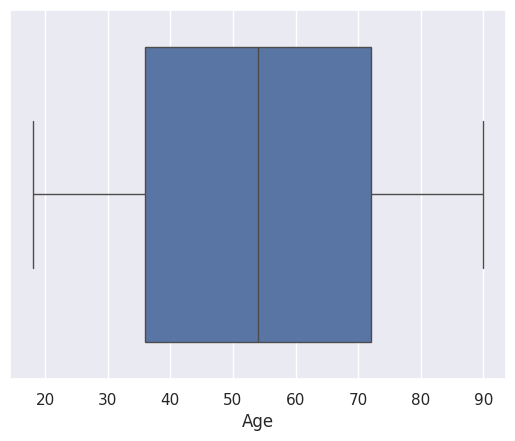

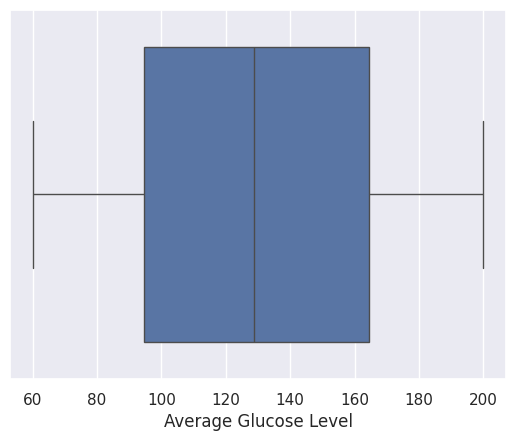

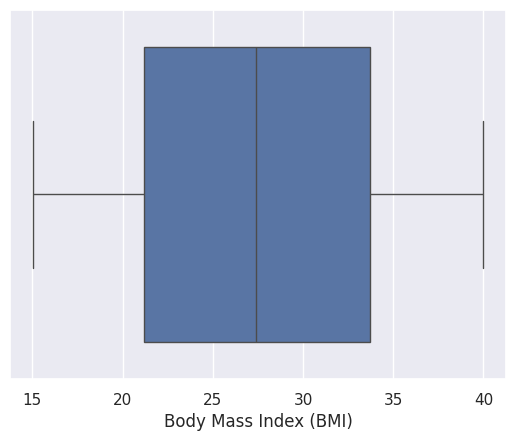

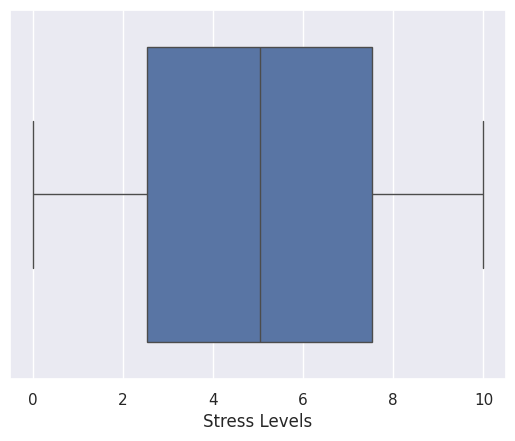

In [17]:
#Determining outliers for numerical columns
#(Age, Average Glucose Level, Body Mass Index, Stress Levels)
sns.boxplot(x=df['Age'])
plt.show()

sns.boxplot(x=df['Average Glucose Level'])
plt.show()

sns.boxplot(x=df['Body Mass Index (BMI)'])
plt.show()

sns.boxplot(x=df['Stress Levels'])
plt.show()

In [18]:
#Identified relevant numeric columns
numeric_cols = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']

#Calculating Q1, Q2, Q3 and IQR for numeric data
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

#Filter rows that are NOT outliers
#Keep rows that are within IQR bounds
condition =~((df[numeric_cols]<(Q1-1.5*IQR)) | (df[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)

#Applying condition to dataset
df_cleaned = df[condition]

#Checking dimension again
print(df_cleaned.shape)


(15000, 22)


In [ ]:
#As proved by the boxplots previously,
#there are no outliers for the columns Age, Average Glucose Level, BMI or Stress levels